# Analysis of the rainfall data

    The dataset was downloaded from 'https://data.gov.in/', a Open Government Data (OGD) Platform of India under National Data Sharing and Accessibility Policy (NDSAP) and from the world bank.The dataset contains rainfall data that collected across the country for the southwest monsoon which occurs during june to september every year. The increase in monsoon leads to growth and prosperous of the country and the decrease may have significant effects on the country's GDP and other areas as well.
   
    When it comes to rainfall and climate of India, there are two important factors that determines the most. They're La-nino and El-nino effect. These phenomenon has its origin from starting of climate change. It's a broad topic to cover. But to put in simple terms, the change in pacific ocean temperature,the change in strength of trade winds and  ocean currents lead to these effects.
    
    When we look into the damages these effects causing to the world is humongous. Scientists, researchers and activists around the world are doing their best to save the people from the forces of nature. This analysis project on the rainfall data of India will help us understand how the rainfall affects the millions of people and their life.

## Objective

1_ How does the rainfall pattern during the monsoon season (June to September) vary across different years? Are there any notable El Niño or La Niña years that significantly impacted the monsoon rainfall?

2_ Is there a correlation between El Niño or La Niña events and the monsoon rainfall patterns? Can we identify any patterns indicating whether El Niño or La Niña tends to result in above-average or below-average rainfall?

3_ How does the variability in monsoon rainfall affect agricultural productivity and, consequently, the GDP of the region? Are there any years with particularly low rainfall and corresponding decreases in GDP growth?

4_ Are there any long-term trends in monsoon rainfall and GDP growth over the years?

5_ Can we identify any relationship between above-average or below-average monsoon rainfall and GDP growth rates in subsequent years? Is there a lagged effect of rainfall variability on economic indicators?

To start my analysis process, I downloaded the data and uploaded them in the notebook.Followed by installing the pandas library and loading the dataset.

In [4]:
import pandas as pd

In [22]:
import numpy as np

In [6]:
rainfall = pd.read_csv("Data/rainfall.csv")
rainfall.head(5)

,YEAR,JUN,JUL,AUG,SEP,JUN-SEP
0,1901,111.0,243.2,273.6,124.6,752.4
1,1902,109.0,282.8,201.8,201.0,794.7
2,1903,117.0,292.0,271.7,200.9,881.7
3,1904,165.2,263.1,205.2,131.7,765.2
4,1905,92.3,254.9,201.4,180.0,728.6


In [8]:
rainfall.shape

(119, 6)

In [10]:
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     119 non-null    int64  
 1   JUN      119 non-null    float64
 2   JUL      119 non-null    float64
 3   AUG      119 non-null    float64
 4   SEP      119 non-null    float64
 5   JUN-SEP  119 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 5.7 KB


In [20]:
rainfall = rainfall.dropna().drop_duplicates()

In [21]:
rainfall.shape

(119, 6)

After loading the dataset, I just go through the data to see how many rows and columns are there, datatype of each column, null values and duplicate data. I would like to change the datatype of each column to int64 because it would be easy to plot.

In [24]:
rainfall['YEAR'] = rainfall['YEAR'].astype(np.int64)
rainfall['JUN'] = rainfall['JUN'].astype(np.int64)
rainfall['JUL'] = rainfall['JUL'].astype(np.int64)
rainfall['AUG'] = rainfall['AUG'].astype(np.int64)
rainfall['SEP'] = rainfall['SEP'].astype(np.int64)
rainfall['JUN-SEP'] = rainfall['JUN-SEP'].astype(np.int64)
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   YEAR     119 non-null    int64
 1   JUN      119 non-null    int64
 2   JUL      119 non-null    int64
 3   AUG      119 non-null    int64
 4   SEP      119 non-null    int64
 5   JUN-SEP  119 non-null    int64
dtypes: int64(6)
memory usage: 5.7 KB


In [25]:
rainfall.head(3)

,YEAR,JUN,JUL,AUG,SEP,JUN-SEP
0,1901,111,243,273,124,752
1,1902,109,282,201,201,794
2,1903,117,292,271,200,881


Now we have changed the datatype from float to integer. The data is almost clean on its own. Let me change the name of the 'JUN-SEP' column to 'TOTAL_RAIN'.

In [26]:
new_name = {'JUN-SEP':'TOTAL_RAIN'}
rainfall = rainfall.rename(columns = new_name)

In [27]:
rainfall.head(2)

,YEAR,JUN,JUL,AUG,SEP,TOTAL_RAIN
0,1901,111,243,273,124,752
1,1902,109,282,201,201,794


I have the rainfall data till the year 2019. I need data for the year 2020, 2021, 2022 and 2023. I'm going to collect this manually and add it to the rain variable using .concat()

I searched the data and got the total rainfall of the southwest monsoon for those years, not the monthwise data. I'm going to use 'np.nan' for the unavailable month fields and not zero. Because both are different in meaning.

In [37]:
to_add = pd.DataFrame({'YEAR' : [2020,2021,2022,2023], 'JUN' : [np.nan,np.nan,np.nan,np.nan], 'JUL' : [np.nan,np.nan,np.nan,np.nan], 'AUG' : [np.nan,np.nan,np.nan,np.nan], 'SEP' : [np.nan,np.nan,np.nan,np.nan], 'TOTAL_RAIN' : [956,874,924,820]})
print(to_add)
print(type(to_add))

   YEAR  JUN  JUL  AUG  SEP  TOTAL_RAIN
0  2020  NaN  NaN  NaN  NaN         956
1  2021  NaN  NaN  NaN  NaN         874
2  2022  NaN  NaN  NaN  NaN         924
3  2023  NaN  NaN  NaN  NaN         820
<class 'pandas.core.frame.DataFrame'>


In [39]:
rain = pd.concat([rain, to_add], ignore_index=True)
rain.shape

(63, 6)

In [32]:
rain = rainfall.query('YEAR > 1960')
rain.head(3)

,YEAR,JUN,JUL,AUG,SEP,TOTAL_RAIN
60,1961,191,337,288,236,1053
61,1962,135,281,276,210,903
62,1963,168,258,319,166,913


By using the query() method, I filtered the data that I need for further analysis in the name of "rain" variable. Here after, I can move into data manipulation and visualisation of the data.

In [40]:
rain.tail(3)

,YEAR,JUN,JUL,AUG,SEP,TOTAL_RAIN
60,2021,NaN,NaN,NaN,NaN,874
61,2022,NaN,NaN,NaN,NaN,924
62,2023,NaN,NaN,NaN,NaN,820


First, I'm going to find the sum of rainfall for each month to know which month receives the most rain during monsoon. Then, el-nino years variable will be created to get the annual rainfall for those years. Visualisation of data will be done to find out the relation.

In [45]:
sum_rain = rain[['JUN','JUL','AUG','SEP']].sum()
print(sum_rain)
print("lowest rainfall is",sum_rain.min())
print("highest rainfall is",sum_rain.max())

JUN     9716.0
JUL    16704.0
AUG    15169.0
SEP     9983.0
dtype: float64
lowest rainfall is 9716.0
highest rainfall is 16704.0


It is clearly seen that JUL and AUG are receiving the most rainfall(middle months of monsoon). Now i need to check the el-nino year's monthly data that, is the JUL and AUG months of those years receive normal or deficit rain?

In [69]:
sum_rain
print(type(sum_rain))

<class 'pandas.core.series.Series'>


The output 'sum_rain' need to be plotted in bars. So, the pandas series has to be changed as a pandas dataframe. Then the plot can be easily done.

In [65]:
sum = sum_rain.reset_index()
sum.columns = ['month','rain in mm']
print(sum)

  month  rain in mm
0   JUN      9716.0
1   JUL     16704.0
2   AUG     15169.0
3   SEP      9983.0


In [70]:
print(type(sum))

<class 'pandas.core.frame.DataFrame'>


<Axes: xlabel='month', ylabel='rain in mm'>

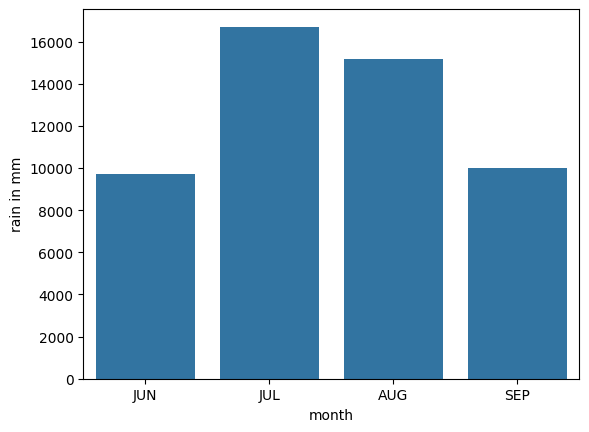

In [71]:
sns.barplot(data = sum,x = 'month',y = 'rain in mm')

In [46]:
elnino_years = [1957,1965,1966,1972,1976,1982,1987,1991,1997,2002,2004,2009,2014,2015,2018]
elnino = rain[rain['YEAR'].isin(elnino_years)]
elnino

,YEAR,JUN,JUL,AUG,SEP,TOTAL_RAIN
4,1965,115.0,270.0,192.0,131.0,709
5,1966,177.0,251.0,217.0,147.0,794
11,1972,122.0,207.0,222.0,129.0,682
15,1976,158.0,295.0,296.0,143.0,894
21,1982,136.0,231.0,277.0,126.0,771
26,1987,134.0,223.0,247.0,152.0,757
30,1991,185.0,280.0,262.0,136.0,864
36,1997,172.0,286.0,262.0,152.0,874
41,2002,171.0,140.0,245.0,139.0,695
43,2004,168.0,241.0,256.0,124.0,790


In [50]:
import matplotlib.pyplot as plt

In [49]:
import seaborn as sns

<Figure size 1200x900 with 0 Axes>

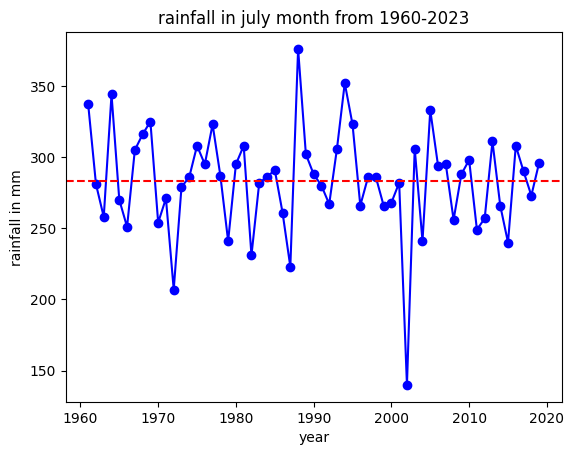

<Figure size 1200x900 with 0 Axes>

In [56]:
plt.plot(rain.YEAR,rain.JUL,'o-b')
plt.axhline(y=283, color='red', linestyle='--')
plt.xlabel('year')
plt.ylabel('rainfall in mm')
plt.title('rainfall in july month from 1960-2023')
plt.figure(figsize=(12,9))

From the graph i observed that all the elnino years received average to below average rainfall(<283mm).

<Figure size 1200x900 with 0 Axes>

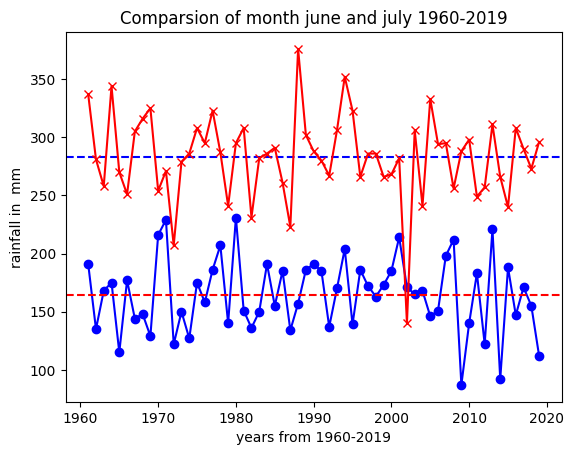

<Figure size 1200x900 with 0 Axes>

In [61]:
plt.plot(rain.YEAR,rain.JUN,'o-b')
plt.axhline(y=283,linestyle='--', color= 'blue')
plt.plot(rain.YEAR,rain.JUL,'x-r')
plt.axhline(y=164, color='red', linestyle='--')
plt.title("Comparsion of month june and july 1960-2019")
plt.xlabel('years from 1960-2019')
plt.ylabel('rainfall in  mm')
plt.figure(figsize=(12,9))

As a summary, months of july and august receives the most rain of monsoon. During the elnino years, monthly rainfall is average to below average. The interesting point to note is,the previous year of a elnino years is a year of average to above average receiving year which is a lanino years.

so, I conclude that this weather phenomenon is a cyclic process. If a year or two is elnino, then the next year will be followed by average to above average rainfall year. 

Secondly, I'm going to analyse the relationship between annual rainfall and elnino effect. I found that 880mm is the Long Period Average(LPA) for the southwest monsoon.

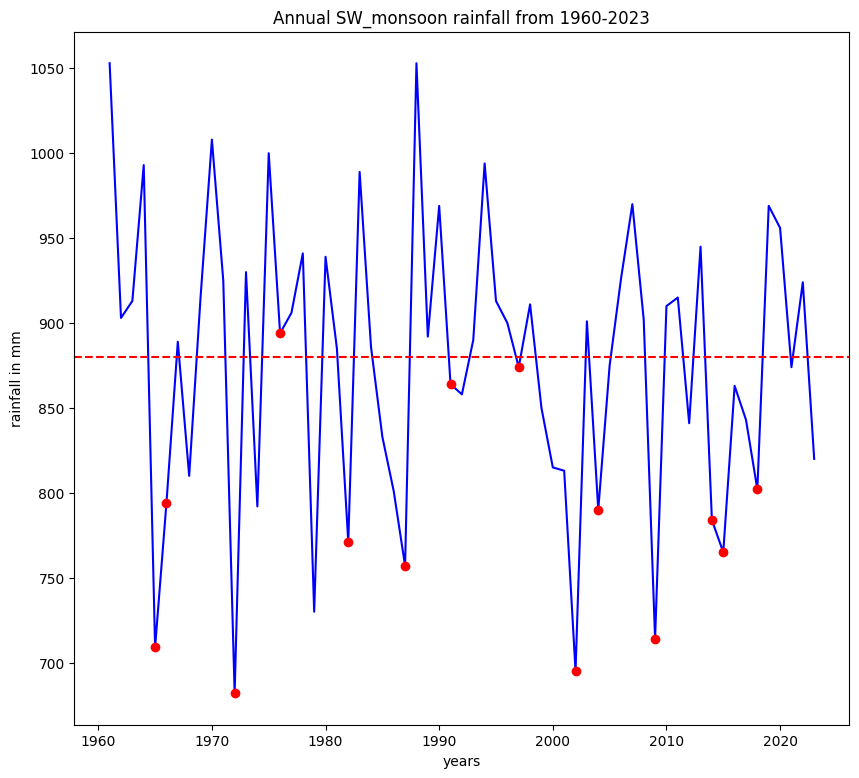

In [74]:
plt.figure(figsize=(10,9))
plt.plot(rain.YEAR,rain.TOTAL_RAIN,'-b')
plt.title("Annual SW_monsoon rainfall from 1960-2023")
plt.xlabel("years")
plt.ylabel("rainfall in mm")
plt.axhline(y = 880, linestyle = '--', color = 'red')
plt.plot(elnino.YEAR,elnino.TOTAL_RAIN,'or')

We can clearly notice that most of the red color plot is below the average line. These are the El-nino years which causes the world to crumble. It repeats itself every 2 to 7 years. As we see there is no clear pattern formation like every 2 year, every 5 year...

But one thing is sure. If we got enough or excess rain, the following years will be deficit rain and vice versa.

Thirdly, I'm going to find out whether the deficit in rainfall stagnants or decreases the growth of the country using the GDP data of India. I'm going to follow the same steps from above to load, clean, manipulate and visualisation of the GDP data.

In [77]:
gdp_all = pd.read_csv("Data/gdp.csv")
gdp_all.head(3)

,Country Name,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,India,3.722743,2.931128,5.994353,7.45295,-2.63577,-0.055329,7.825963,3.387929,6.5397,...,6.386106,7.410228,7.996254,8.256305,6.795383,6.453851,3.871437,-5.831053,9.050278,7.239693


In [78]:
gdp_all.columns

Index(['Country Name', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')

In [80]:
gdp = gdp_all.unstack()

In [81]:
gdp.info()

<class 'pandas.core.series.Series'>
MultiIndex: 63 entries, ('Country Name', 0) to ('2022', 0)
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
63 non-null     object
dtypes: object(1)
memory usage: 1.3+ KB


In [83]:
gdp_1 = gdp.reset_index()
gdp_1.columns = ['year','n','GDP']
print(gdp_1)

            year  n       GDP
0   Country Name  0     India
1           1961  0  3.722743
2           1962  0  2.931128
3           1963  0  5.994353
4           1964  0   7.45295
..           ... ..       ...
58          2018  0  6.453851
59          2019  0  3.871437
60          2020  0 -5.831053
61          2021  0  9.050278
62          2022  0  7.239693

[63 rows x 3 columns]


In [91]:
print(type(gdp_1))

<class 'pandas.core.frame.DataFrame'>


In [94]:
gdp_1 = gdp_1.drop('n',axis=1)

In [95]:
gdp_1 = gdp_1.drop(0,axis=0)
gdp_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 1 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    62 non-null     object
 1   GDP     62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [108]:
gdp_1['year'] = gdp_1['year'].astype(np.int64)
gdp_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 1 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    62 non-null     int64 
 1   GDP     62 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [103]:
gdp_1.head(3)

,year,GDP
1,1961,3.722743
2,1962,2.931128
3,1963,5.994353


In [106]:
elnino_years = [1957,1965,1966,1972,1976,1982,1987,1991,1997,2002,2004,2009,2014,2015,2018]
print(elnino_years)

[1957, 1965, 1966, 1972, 1976, 1982, 1987, 1991, 1997, 2002, 2004, 2009, 2014, 2015, 2018]


In [109]:
el_gdp = gdp_1[gdp_1['year'].isin(elnino_years)]
el_gdp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 5 to 58
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    14 non-null     int64 
 1   GDP     14 non-null     object
dtypes: int64(1), object(1)
memory usage: 336.0+ bytes


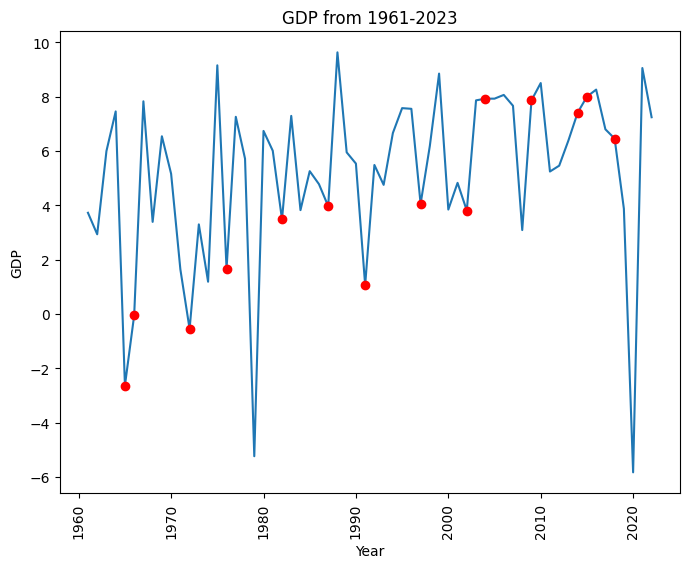

In [111]:
plt.figure(figsize=(8, 6))
plt.plot(gdp_1.year,gdp_1.GDP, linestyle='-')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('GDP')
plt.title('GDP from 1961-2023')

plt.plot(el_gdp.year,el_gdp.GDP,'or')
plt.show()

From the above graph, it's clear that 1st 9 elnino years leads to decrease in the GDP of the country. The last 5 elnino years, after the year 2000, it looks like exceptional. This may be due to the India's fast forward growth.

We can see three down spikes in the year 1979, 2008 and 2020. As we all know Covid was the reason for 2020 down spike. The year 2008 marks important in the world economy because of it's disruption. Most of the countries GDP remains low during that time. The 1979 spike was mainly due to severe drought gripping most of the country and crude oil prices almost doubling due to supply disruptions because of the Iranian revolution against the state’s monarch. 

To answer the 4th question, let me use the 'rainfall' variable from the beginning to get data over 100 years. 

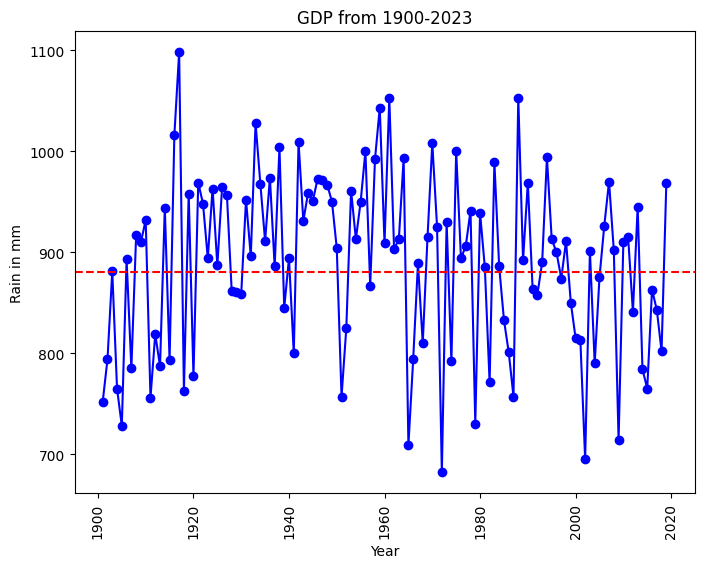

In [113]:
plt.figure(figsize=(8, 6))
plt.plot(rainfall.YEAR,rainfall.TOTAL_RAIN ,'o-b')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Rain in mm')
plt.title('GDP from 1900-2023')

plt.axhline(y=880,linestyle = '--',color = 'red')
plt.show()

When we visualise the data, there are half of the years under average rain 880mm and half above the average. But there is another point to look into.
In the 120 years of data, lets divide into 2 parts. 1st half from 1900 to 1960 and remaining years(1961-2020) rests in 2nd.

The measurement between the two consecutive years of 1st half rain is small or <100mm.For example: rain in 1902 is 794 and in 1903 is 881, obviously <100mm. Rarely it exceeds this level. But in the 2nd half, the rainfall gap between two consecutive years exceeds more than 15 times. 

What is this insight actually referring to? It's global warming,the rainfall pattern that got affected.That's why one year got >1000mm of rain and the other year got <800mm of rain which leads to severe droughts and famines.

After analysing so far, the answer to the final question might be this. If the rainfall of this year is good, then the following year may get average or deficit rainfall. And if the rainfall is deficit, then it might good next year. Nature is unpredictable and as i said earlier that it's a cyclic process "Nature burns and heals on its own".

The GDP of India keeps growing and it's evident now. That's what the data says. After 1990, there is no negetive numbers except 2020. It's steady and winning.